# 🧪 Interatomic Potential and Force Analysis

In this project, we simulate and analyze a simplified interatomic potential:

\[
E(d) = -\frac{2A}{d^2} + \frac{B}{d^4}
\]

This potential describes the balance between **long-range attraction** (van der Waals-like) and **short-range repulsion** (Pauli exclusion effects). We visualize the potential well, compute its derivative (the force), and find the equilibrium bond distance.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

## 📐 Define the Potential Function

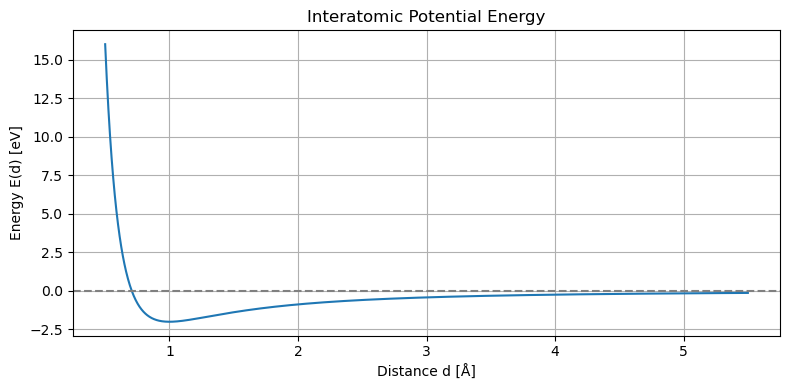

In [2]:
# Constants
A = 2  # Attractive strength
B = 2  # Repulsive strength

# Distance range in Angstroms
d = np.linspace(0.5, 5.5, 2001)

# Potential energy function
def potential(d, A=2, B=2):
    return -2 * A / d**2 + B / d**4

E = potential(d, A, B)

# Plot the potential
plt.figure(figsize=(8, 4))
plt.plot(d, E)
plt.title("Interatomic Potential Energy")
plt.xlabel("Distance d [Å]")
plt.ylabel("Energy E(d) [eV]")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📉 Compute and Plot the Force (−dE/dd)

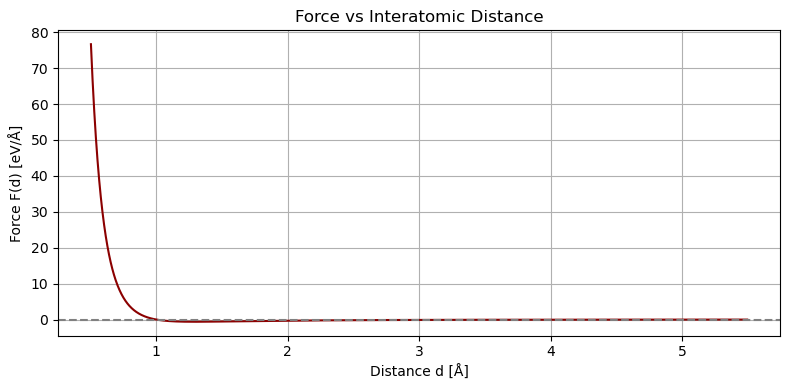

In [3]:
# Numerical derivative using 4th-order central difference
dx = d[1] - d[0]
force = -(np.array([(E[i] - 8*E[i+1] + 8*E[i+2] - E[i+3]) / (12 * dx)
                   for i in range(len(d) - 4)]))

# Centered distance array
d_force = d[2:-2]

plt.figure(figsize=(8, 4))
plt.plot(d_force, force, color='darkred')
plt.title("Force vs Interatomic Distance")
plt.xlabel("Distance d [Å]")
plt.ylabel("Force F(d) [eV/Å]")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📍 Find Equilibrium Distance (Minimum Energy)

In [4]:
# Use scipy to minimize the potential
result = minimize_scalar(lambda d: potential(d), bounds=(0.5, 5.5), method='bounded')
equilibrium_d = result.x
min_energy = result.fun

print(f"Equilibrium bond distance: {equilibrium_d:.4f} Å")
print(f"Minimum energy: {min_energy:.4f} eV")

Equilibrium bond distance: 1.0000 Å
Minimum energy: -2.0000 eV


## 🔁 Optional: Compare to Lennard-Jones Potential

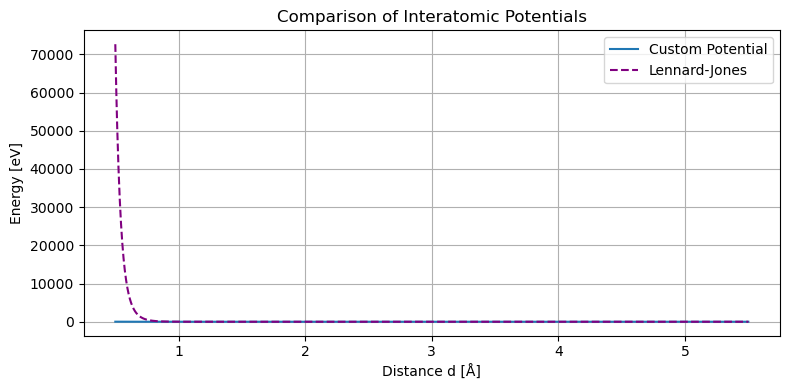

In [5]:
# Lennard-Jones potential for comparison
def lj(d, epsilon=0.5, sigma=1.2):
    return 4 * epsilon * ((sigma / d)**12 - (sigma / d)**6)

E_lj = lj(d)

plt.figure(figsize=(8, 4))
plt.plot(d, E, label='Custom Potential')
plt.plot(d, E_lj, '--', label='Lennard-Jones', color='purple')
plt.xlabel("Distance d [Å]")
plt.ylabel("Energy [eV]")
plt.title("Comparison of Interatomic Potentials")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

## 📊 Summary

- The custom potential model captures a **short-range repulsion** and **long-range attraction**.
- The force profile helps us identify **stable (zero-force) bond length**.
- You can modify constants A and B to simulate different materials or molecular systems.
- The comparison with the Lennard-Jones potential shows how different models approximate real interactions.

This model can be used to build intuition for molecular bonding, lattice spacing, and equilibrium behavior in atomic systems.
